In [66]:
######
# @:Author: Jiageng Ding
# @:Date: 2023-02-17 19:10:51
# @:Mail: jiageng.ding@gmail.com
# @:LastEditors: Jiageng Ding
# @:LastEditTime: 2023-02-17 19:12:26
# @:FilePath: /TB2/ADFT/cw2/lt22041.ipynb
######

# ADFT CW2

## Data loading

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn import linear_model

ms_df = pd.read_csv('MSFT.csv', header=0, infer_datetime_format=True, parse_dates=[0], 
index_col=[0])

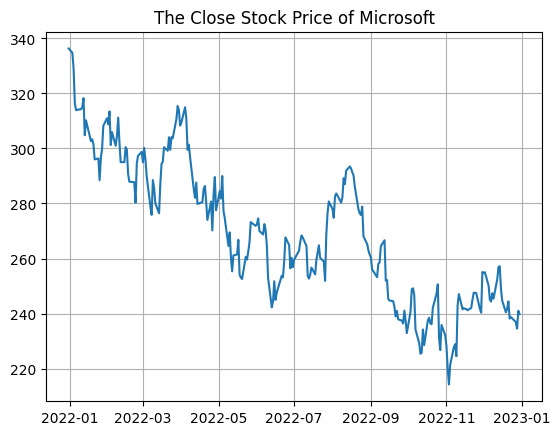

In [140]:
plt.plot(ms_df['Close'])
plt.title('The Close Stock Price of Microsoft')
plt.grid()

## Q3: Plot the predicted and true stock price with the autoregressive (AR) model

In [76]:
def AR(p: int, df):
    """Autoregressive Model

	Args:
		p (int): lag number
		df (DataFrame): data set

	"""
    df_temp = df

    #Lag feature generation: Generating the lagged p terms
    for i in range(1, p + 1):
        df_temp['Shifted_values_%d' % i] = df_temp['Close'].shift(i)

    # Generate the training (70%) and test (30%) data set
    train_size = int(0.7 * df_temp.shape[0])

    #Breaking data set into test and training
    df_train = pd.DataFrame(df_temp[0:train_size])
    df_test = pd.DataFrame(df_temp[train_size:df.shape[0]])

    df_train_2 = df_train.dropna()
    #X contains the lagged values ,hence we skip some rows
    X_train = df_train_2.iloc[:, 1:].values.reshape(-1, p)

    #Y contains the value,it is the first column
    y_train = df_train_2.iloc[:, 0].values.reshape(-1, 1)
    #Running linear regression to generate the coefficents of lagged terms
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    theta = lr.coef_.T
    intercept = lr.intercept_
    df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
    # df_train_2[['Value','Predicted_Values']].plot()

    X_test = df_test.iloc[:, 1:].values.reshape(-1, p)
    df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
    # df_test[['Value','Predicted_Values']].plot()

    RMSE = np.sqrt(
        mean_squared_error(df_test['Close'], df_test['Predicted_Values']))

    print("The RMSE is :", RMSE, ", Value of p : ", p)
    return [df_train_2, df_test, theta, intercept, RMSE]


/home/jiageng/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


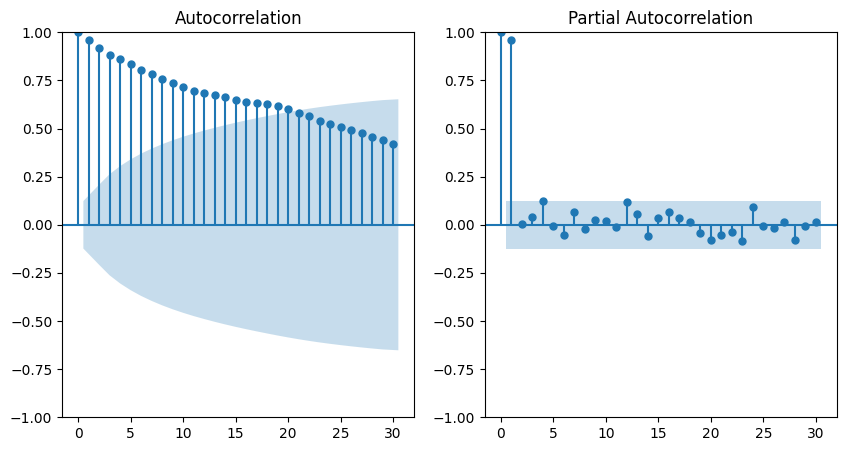

In [146]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ACF = plot_acf(ms_df.Close.dropna(), lags=30, ax=ax[0])
# with the PACF, we can figure out how many lags we need in the AR model.
PACF = plot_pacf(ms_df.Close.dropna(), lags=30, ax=ax[1])

/tmp/ipykernel_1081895/3887222924.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 5.905766692988994 , Value of p :  1


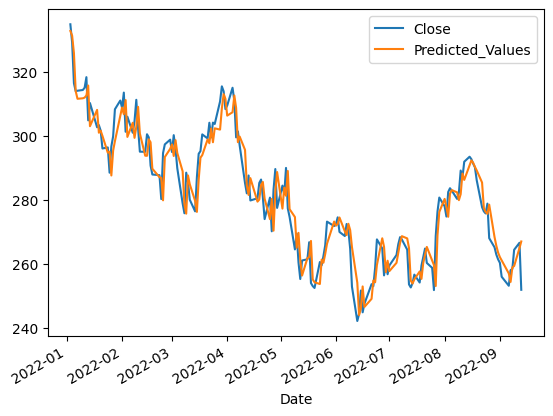

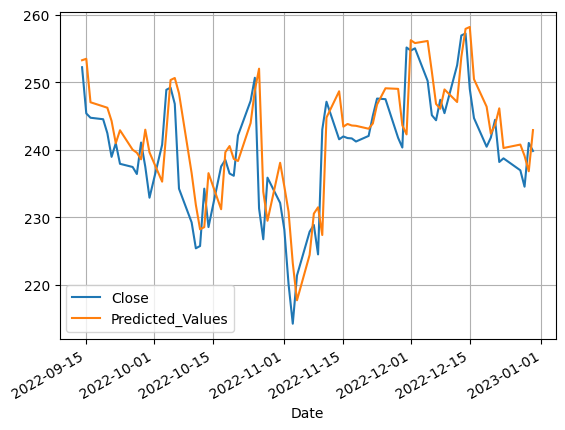

In [148]:
[df_train,df_test,theta,intercept,RMSE] = AR(1, pd.DataFrame(ms_df.Close))

df_train[['Close','Predicted_Values']].plot()
figg = df_test[['Close','Predicted_Values']].plot()
figg.grid()

## Differencial Close Price

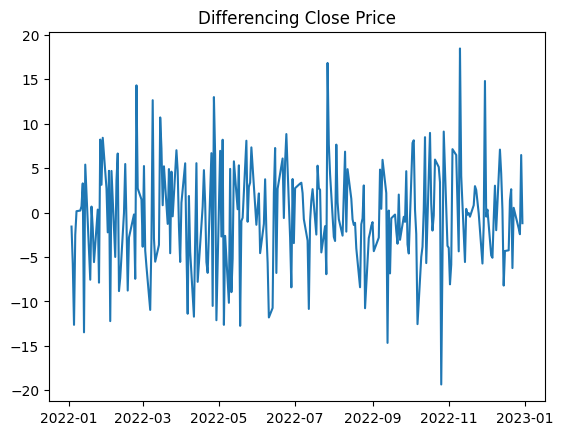

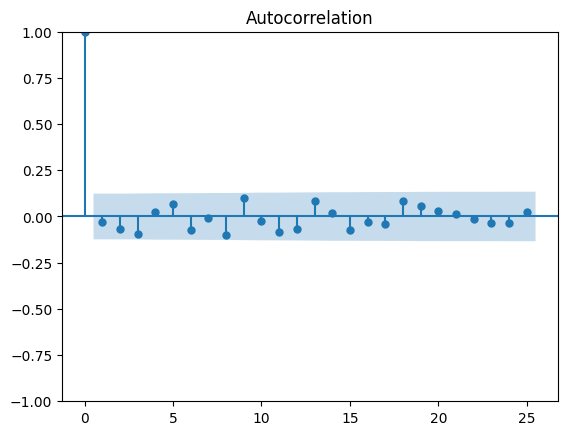

In [141]:
ms_df = pd.read_csv('MSFT.csv', header=0, infer_datetime_format=True, parse_dates=[0], 
index_col=[0])

df['diff'] = ms_df.Close.diff()
plt.plot(df['diff'])
plt.title('Differencing Close Price')

ACF = plot_acf(df['diff'].dropna(),lags=25)
# with the PACF, we can figure out how many lags we need in the AR model.